# Import Modules and Data

In [243]:
#imports

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sn

#estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

#cross validation

from sklearn.model_selection import train_test_split

#helper

%matplotlib inline

In [244]:
#import data

rawData = pd.read_csv('creditonedata_cleaned2.csv')
rawData.head()

,Unnamed: 0,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university,default
0,0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,0,1,1
1,1,120000,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,0,1,1
2,2,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,1,0,0,0,1,0
3,3,50000,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,1,0,0,0,1,0
4,4,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,0,0,1,0


In [245]:
#drop the unnamed column

data = rawData.drop(['Unnamed: 0'], axis = 1)

In [246]:
data.head()

,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university,default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,1,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,1,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,1,0
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,0,0,1,0


In [247]:
data.info() 
#dtypes are all int, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   limit_bal                  29965 non-null  int64
 1   marriage                   29965 non-null  int64
 2   age                        29965 non-null  int64
 3   pay_1                      29965 non-null  int64
 4   pay_2                      29965 non-null  int64
 5   pay_3                      29965 non-null  int64
 6   pay_4                      29965 non-null  int64
 7   pay_5                      29965 non-null  int64
 8   pay_6                      29965 non-null  int64
 9   bill_amt1                  29965 non-null  int64
 10  bill_amt2                  29965 non-null  int64
 11  bill_amt3                  29965 non-null  int64
 12  bill_amt4                  29965 non-null  int64
 13  bill_amt5                  29965 non-null  int64
 14  bill_amt6             

# Model Building

## Using all features
For the first model I will use all of the features, and then I'll go back and edit.

In [248]:
#features

X = data.iloc[:, 1:27]
print('Summary of feature sample')
X.head()

Summary of feature sample


,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university,default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,0,0,0,1,0


In [249]:
#dependent variable

y = data['limit_bal']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: limit_bal, dtype: int64

## Cross val score

In [250]:
#prepare each regression algorithm for use

algosClass = []

algosClass.append(('Random Forest Regressor', RandomForestRegressor()))

algosClass.append(('Linear Regression', LinearRegression()))

algosClass.append(('Support Vector Regression', SVR()))

In [251]:
#build an empty list to store model results
#build another empty list to hold the name of each algorithm
#makes printing out results easy
#also passing cross_val_score through the for loop
#will test all three models using three different folds of the data
#r squared is the assessment criteria

results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv = 3, scoring = 'r2')
    names.append(name)
    results.append(result)

In [252]:
#based on cross_val_score, choose the best model to use in the next step to train to make predictions

for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.46694434541306135
Linear Regression 0.35829204530082776
Support Vector Regression -0.050323258219765764


## Train Test Split and Predictions

In [253]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [254]:
#choose algorithm and fit data

algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)

In [255]:
#make predictions on the test set

predictions = model.predict(X_test)

In [256]:
#create a RMSE (root mean squared error) function using sqrt and mean_squared_error

rmse = sqrt(mean_squared_error(y_test, predictions)) 

In [257]:
#use r2_score, ground truth (y_test) and predicitons to calculate R2

predRsquared = r2_score(y_test, predictions)

In [258]:
print('RMSE: %3f' % rmse)
print('R Squared: %.3f' % predRsquared)

RMSE: 93655.036672
R Squared: 0.477


## Graphs

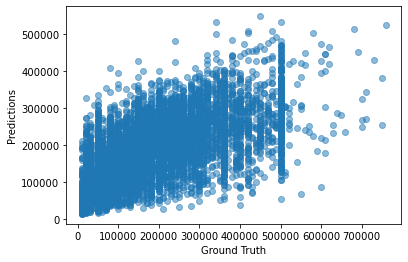

In [259]:
#plot a comparison between the known values in the test set and the predictions made by the model
#create a scatter plot using matplotlib
#the graph won't let me make 2 different colors here like in the example given

plt.scatter(y_test, predictions, cmap = ['Paired'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

Text(0, 0.5, 'Predictions')

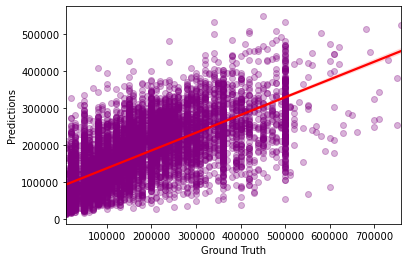

In [260]:
regression = sn.regplot(x = y_test, y = predictions, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'red'})
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')

# Model Building with Feature Selection

Let's narrow down some features from our correlation heatmap.

## Heatmap

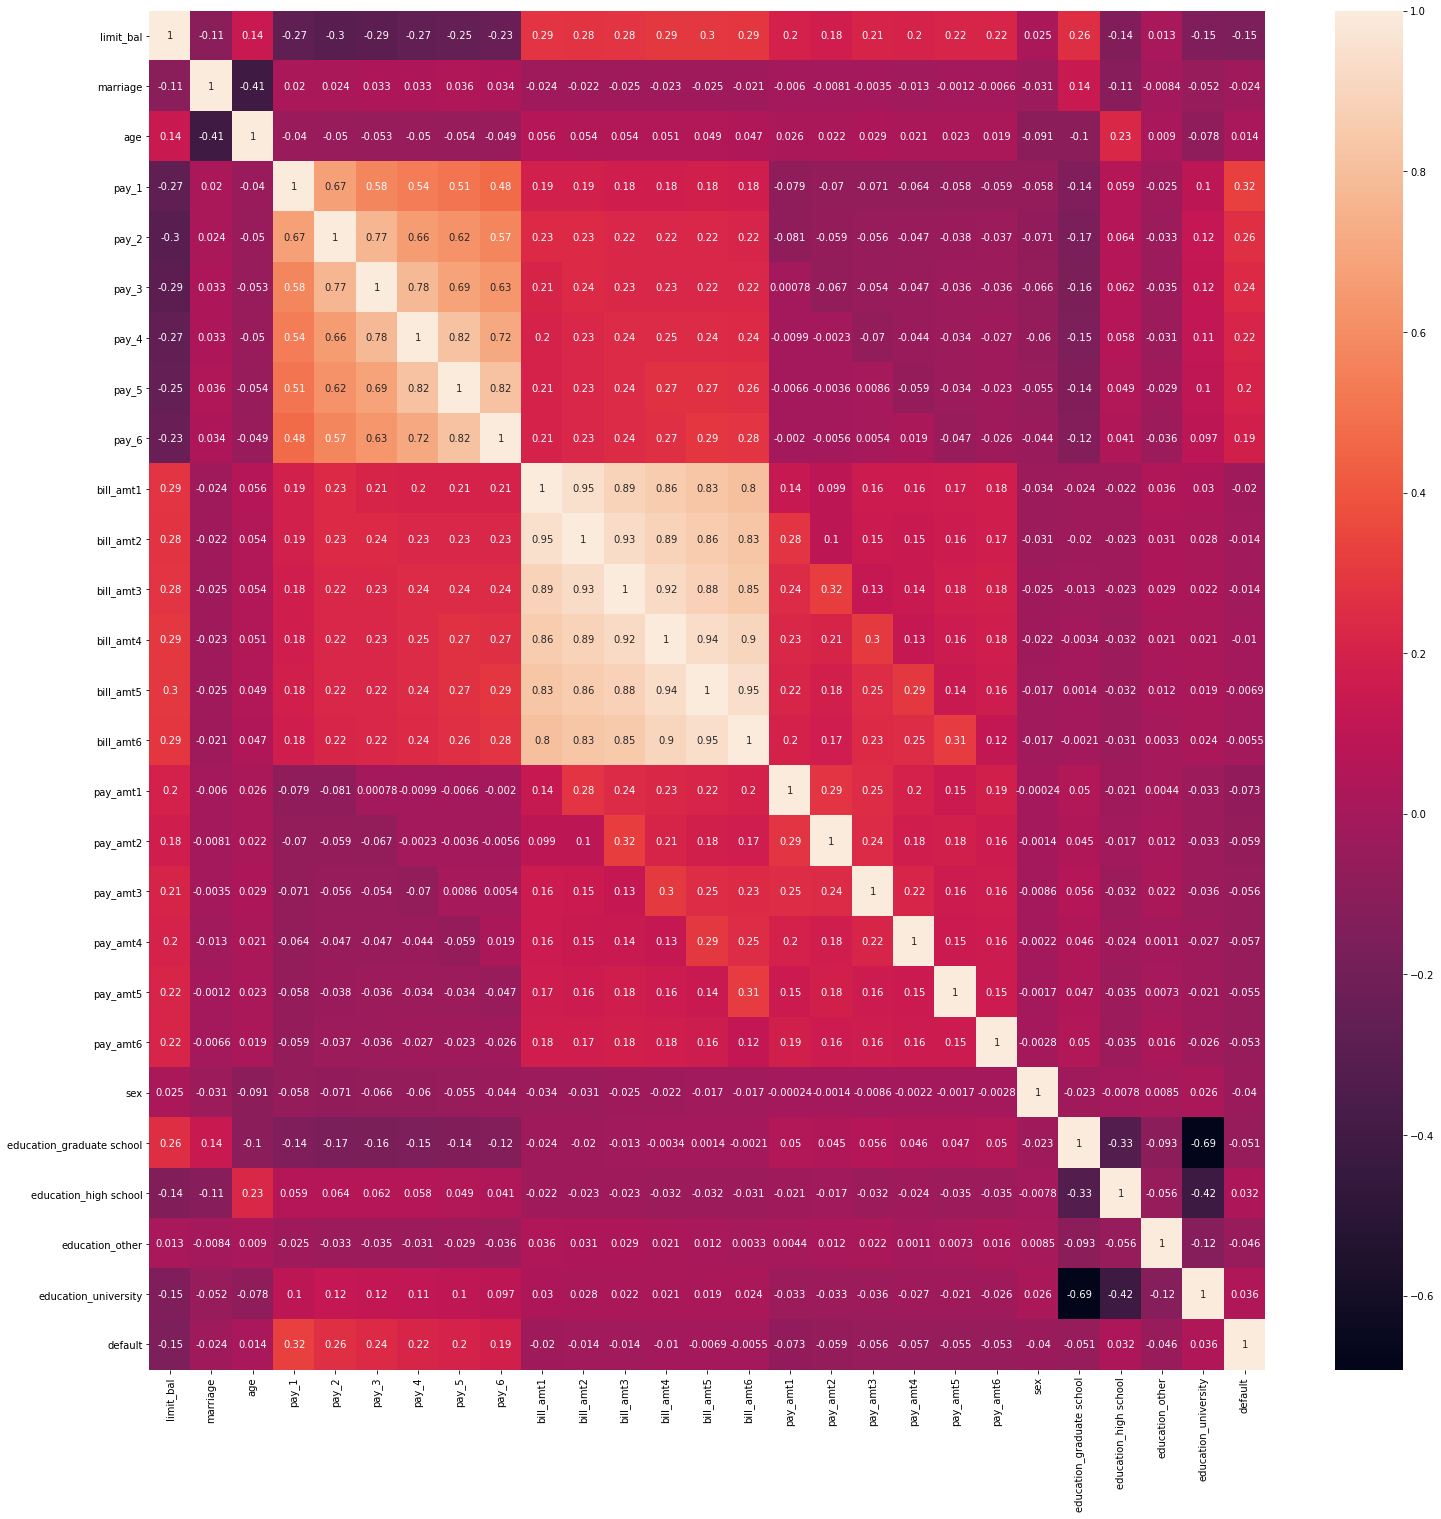

In [261]:
corrMat = data.corr()
plt.subplots(figsize = (25,25)) #the order of this matters! Put the sizing BEFORE the code for the map
hmap = sn.heatmap(corrMat, annot = True)
plt.show()

## Select Features

In [262]:
#drop features with lower correlation

newdata = data.drop(['marriage', 'age', 'sex', 'education_high school', 'education_other', 
                     'education_university', 'limit_bal'], axis = 1)

In [263]:
newdata.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,education_graduate school,default
0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,0,1
1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1
2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0


In [264]:
X = newdata
y = data['limit_bal']

## Cross Val Score

In [265]:
algosClass = []

algosClass.append(('Random Forest Regressor', RandomForestRegressor()))

algosClass.append(('Linear Regression', LinearRegression()))

algosClass.append(('Support Vector Regression', SVR()))

results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv = 3, scoring = 'r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.42334079340640374
Linear Regression 0.33450785946039363
Support Vector Regression -0.05026663923278522


## Train/test and make Predictions

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)

In [267]:
predictions = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, predictions)) 

predRsquared = r2_score(y_test, predictions)

print('RMSE: %3f' % rmse)
print('R Squared: %.3f' % predRsquared)

RMSE: 97797.107918
R Squared: 0.430


# Model Building with Fewer Features

## Select Features

In [268]:
#try removing even more features

newdf = data.drop(['marriage', 'age', 'sex', 'education_high school', 'education_other', 
                     'education_university', 'limit_bal', 'pay_1', 'pay_2', 'pay_3', 'pay_4',
                  'pay_5', 'pay_6'], axis = 1)

In [269]:
newdf.head()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,education_graduate school,default
0,3913,3102,689,0,0,0,0,689,0,0,0,0,0,1
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0


In [270]:
X = newdf
y = data['limit_bal']

In [271]:
algosClass = []

algosClass.append(('Random Forest Regressor', RandomForestRegressor()))

algosClass.append(('Linear Regression', LinearRegression()))

algosClass.append(('Support Vector Regression', SVR()))

results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv = 3, scoring = 'r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.41776708470941176
Linear Regression 0.22697900833207205
Support Vector Regression -0.05015414722239423


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)

In [273]:
predictions = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, predictions)) 

predRsquared = r2_score(y_test, predictions)

print('RMSE: %3f' % rmse)
print('R Squared: %.3f' % predRsquared)

RMSE: 98636.850616
R Squared: 0.420


# Discretize limit_bal

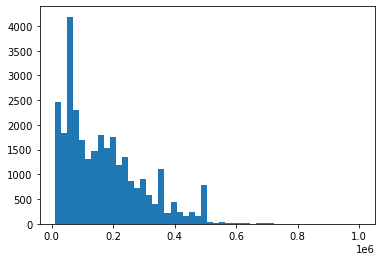

In [274]:
#first look at the distribution of limit_bal

plt.hist(data['limit_bal'], bins = 50)
plt.show()

In [275]:
#using qcut makes the count in each bin relatively the same, but the bin intervals are disproportionate
#using cut makes equal bin intervals but can mean the the count within each bin is disproportionate

data['lim_bal_bins'] = pd.qcut(x = data['limit_bal'], q = 4) #can add Labels=False to this instead of using labelencoder
print(data.groupby(['lim_bal_bins'])['lim_bal_bins'].count())

lim_bal_bins
(9999.999, 50000.0]      7673
(50000.0, 140000.0]      7607
(140000.0, 240000.0]     7627
(240000.0, 1000000.0]    7058
Name: lim_bal_bins, dtype: int64


In [276]:
data.head()

,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt4,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university,default,lim_bal_bins
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,0,1,1,"(9999.999, 50000.0]"
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,0,0,0,1,1,"(50000.0, 140000.0]"
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,1,0,0,0,1,0,"(50000.0, 140000.0]"
3,50000,1,37,0,0,0,0,0,0,46990,...,1100,1069,1000,1,0,0,0,1,0,"(9999.999, 50000.0]"
4,50000,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,0,0,0,1,0,"(9999.999, 50000.0]"


In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
#use label encoder to make the bins into variables that the computer can understand

label = LabelEncoder()

In [279]:
data['lim_bal_cat'] = label.fit_transform(data['lim_bal_bins'])

In [280]:
data.head()

,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university,default,lim_bal_bins,lim_bal_cat
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,1,1,"(9999.999, 50000.0]",0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,1,1,"(50000.0, 140000.0]",1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,1,0,"(50000.0, 140000.0]",1
3,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,1,0,"(9999.999, 50000.0]",0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,0,0,1,0,"(9999.999, 50000.0]",0


## Check corr with disc lim_bal

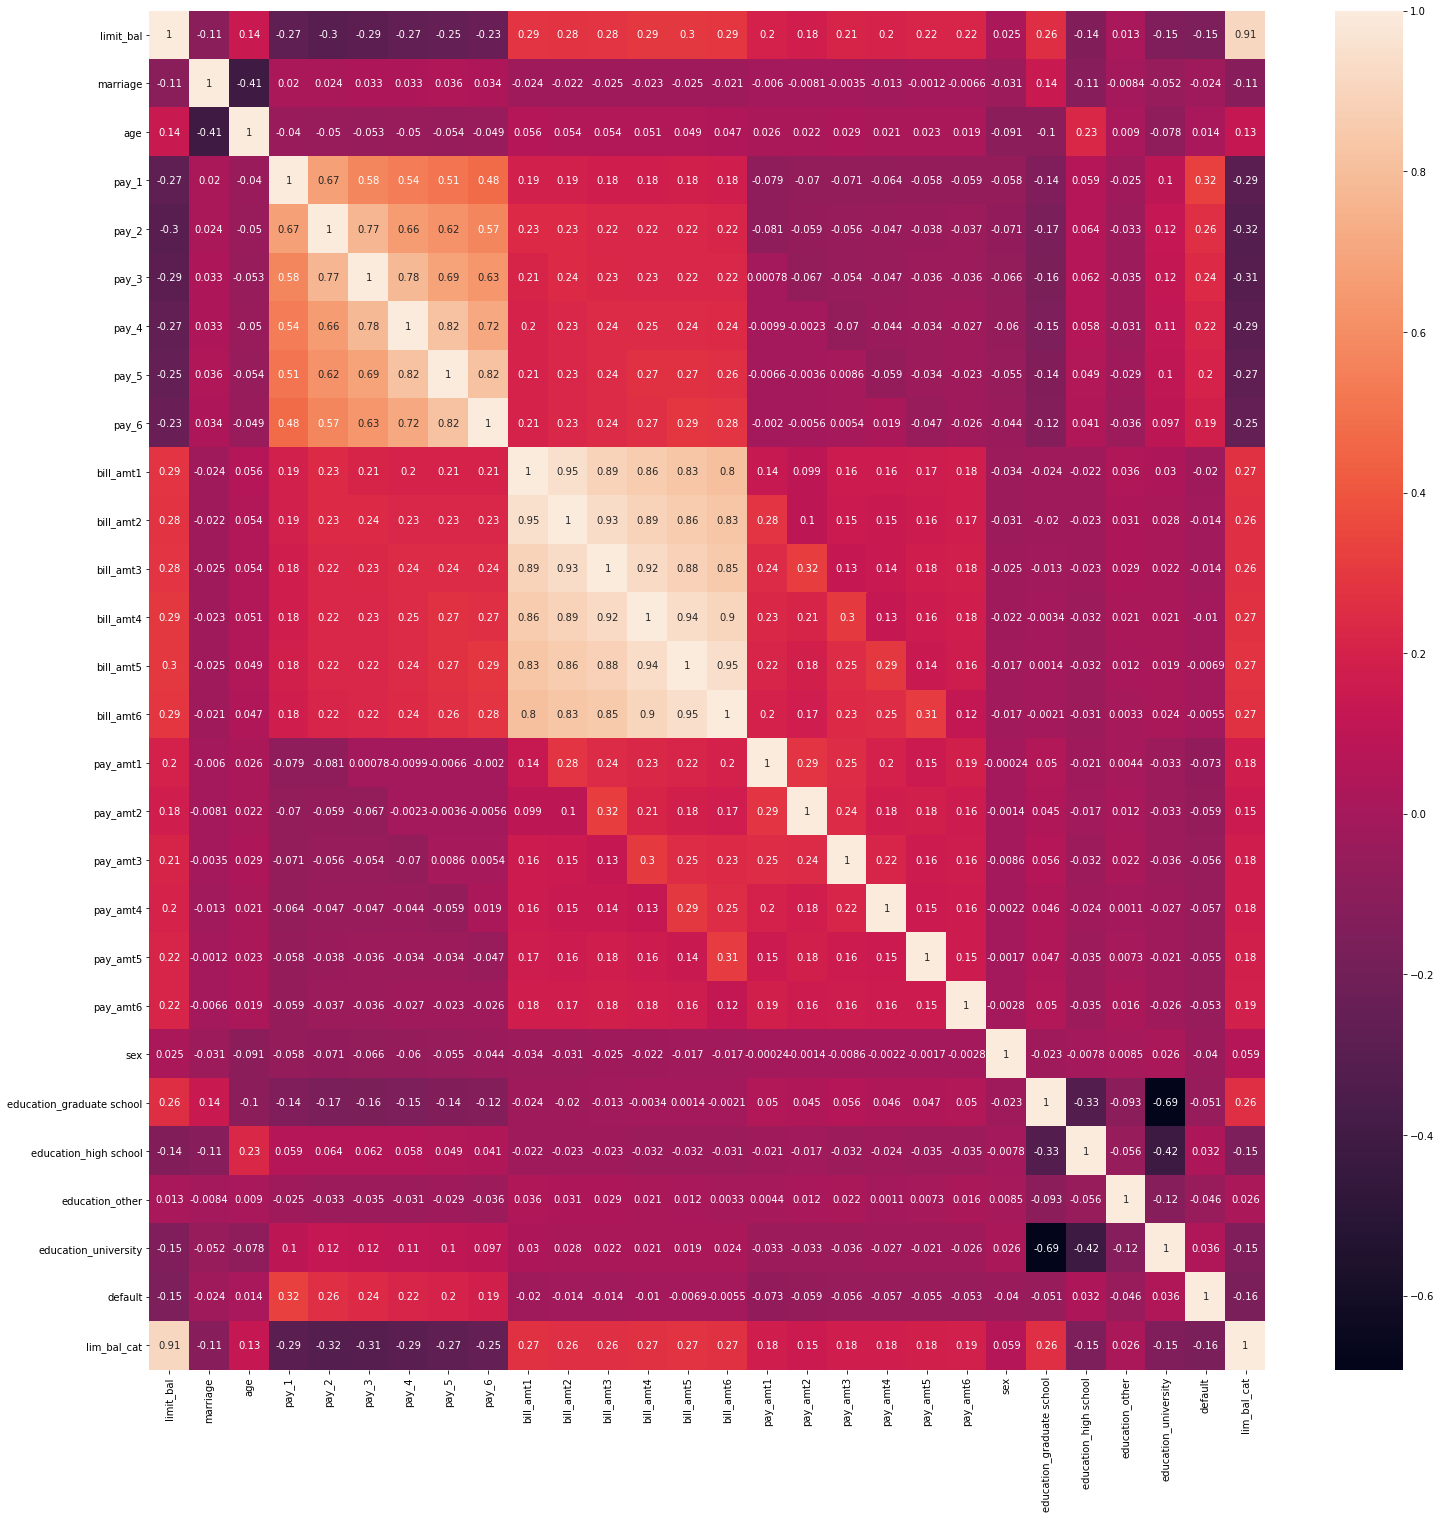

In [281]:
corrMat = data.corr()
plt.subplots(figsize = (25,25))
hmap = sn.heatmap(corrMat, annot = True)
plt.show()

## Build Decision Tree Model

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [283]:
treedata = data.drop(['marriage', 'age', 'sex', 'education_high school', 'education_other', 
                     'education_university', 'limit_bal', 'lim_bal_cat', 'lim_bal_bins','pay_amt1', 'pay_amt2',
                     'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'], axis = 1)

In [284]:
X = treedata
y = data['lim_bal_cat']
X.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,education_graduate school,default
0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,1
1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1
2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0,0
3,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0,0
4,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0,0


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [286]:
pred = model.predict(X_test)

In [287]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      2294
           1       0.46      0.43      0.44      2338
           2       0.37      0.39      0.38      2249
           3       0.43      0.43      0.43      2109

    accuracy                           0.47      8990
   macro avg       0.47      0.47      0.47      8990
weighted avg       0.47      0.47      0.47      8990



In [288]:
from sklearn.tree import plot_tree

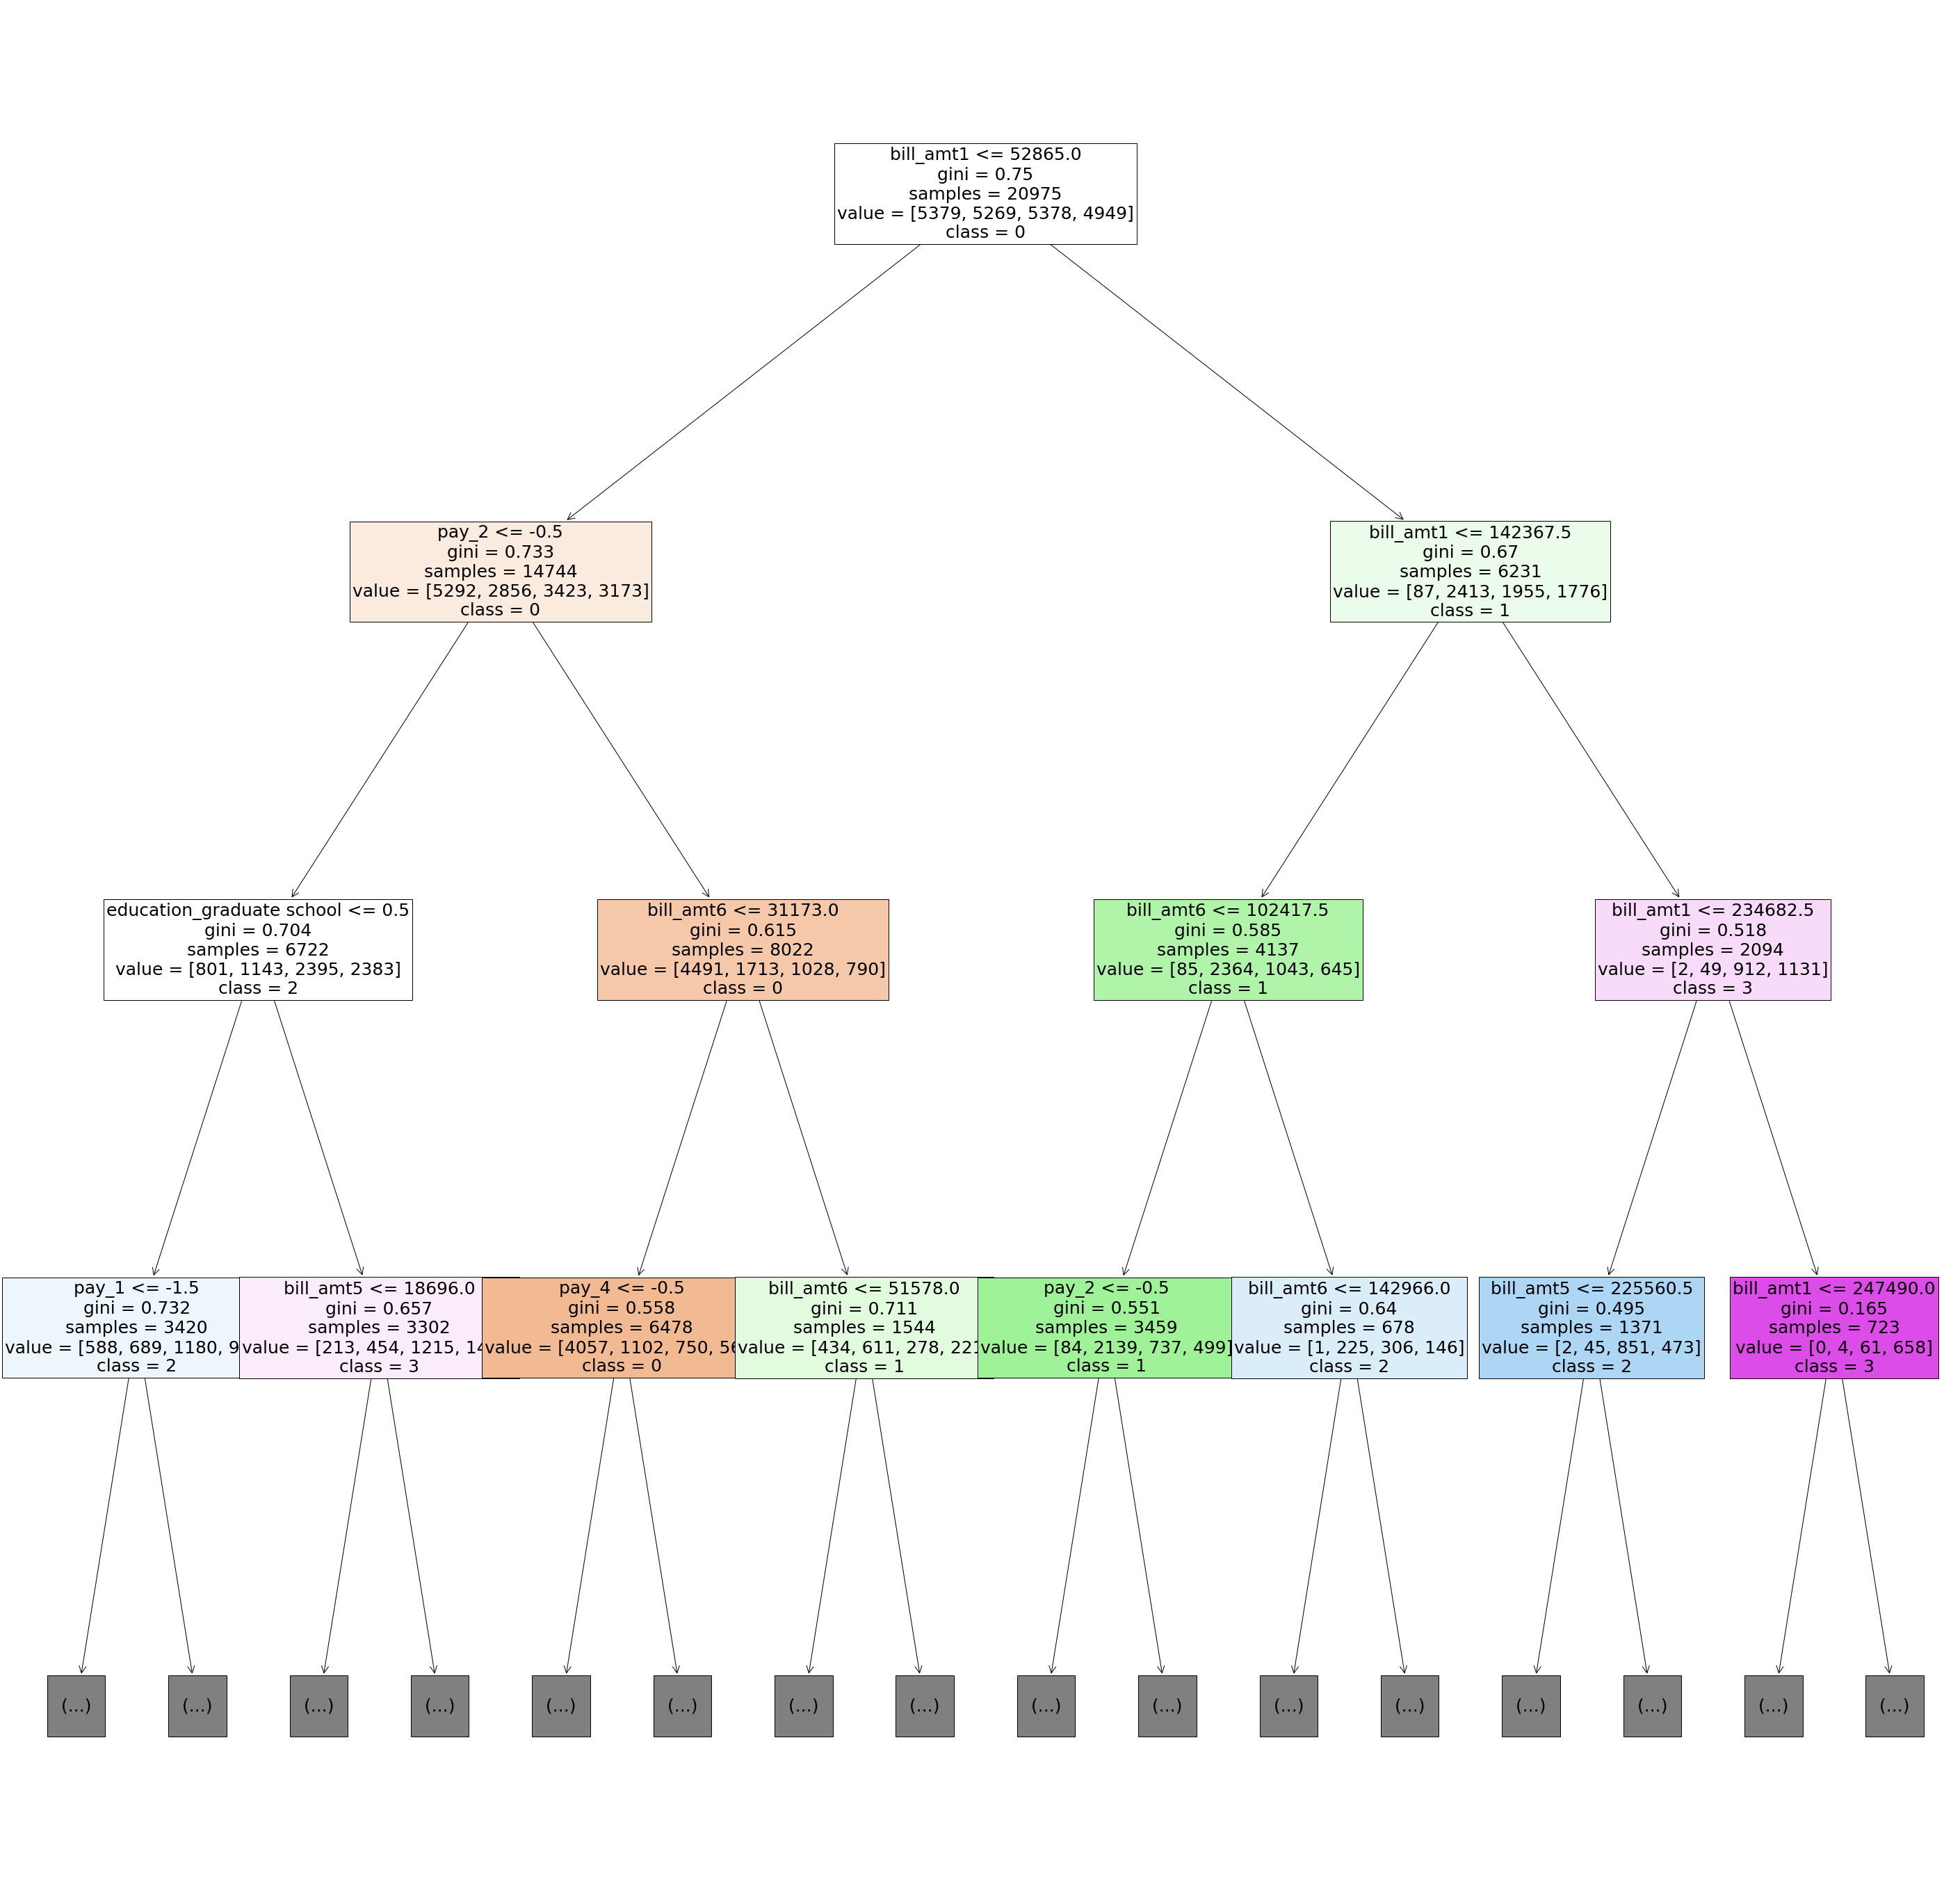

In [289]:
fig = plt.figure(figsize = (50, 50))

tree = plot_tree(model, max_depth = 3, feature_names = X.columns, 
                 class_names = ['0', '1', '2', '3'], filled = True, fontsize = 25)

# Decision Tree with Default as Dependent Variable

In [311]:
defaultdf = data.iloc[:,0:9]
defaultdf.head()

,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,20000,1,24,2,2,-1,-1,-2,-2
1,120000,2,26,-1,2,0,0,0,2
2,90000,2,34,0,0,0,0,0,0
3,50000,1,37,0,0,0,0,0,0
4,50000,1,57,-1,0,-1,0,0,0


In [312]:
X = defaultdf.drop(['marriage', 'age'], axis = 1)
y = data['default']
X.head()

,limit_bal,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,20000,2,2,-1,-1,-2,-2
1,120000,-1,2,0,0,0,2
2,90000,0,0,0,0,0,0
3,50000,0,0,0,0,0,0
4,50000,-1,0,-1,0,0,0


In [313]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv = 3, scoring = 'accuracy') #find cross val score
    names.append(name)
    results.append(result)
    

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7989990832125992
Decision Tree Classifier 0.7927918414166945


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [306]:
pred = model.predict(X_test)

In [307]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      6996
           1       0.56      0.34      0.43      1994

    accuracy                           0.80      8990
   macro avg       0.70      0.63      0.65      8990
weighted avg       0.77      0.80      0.78      8990



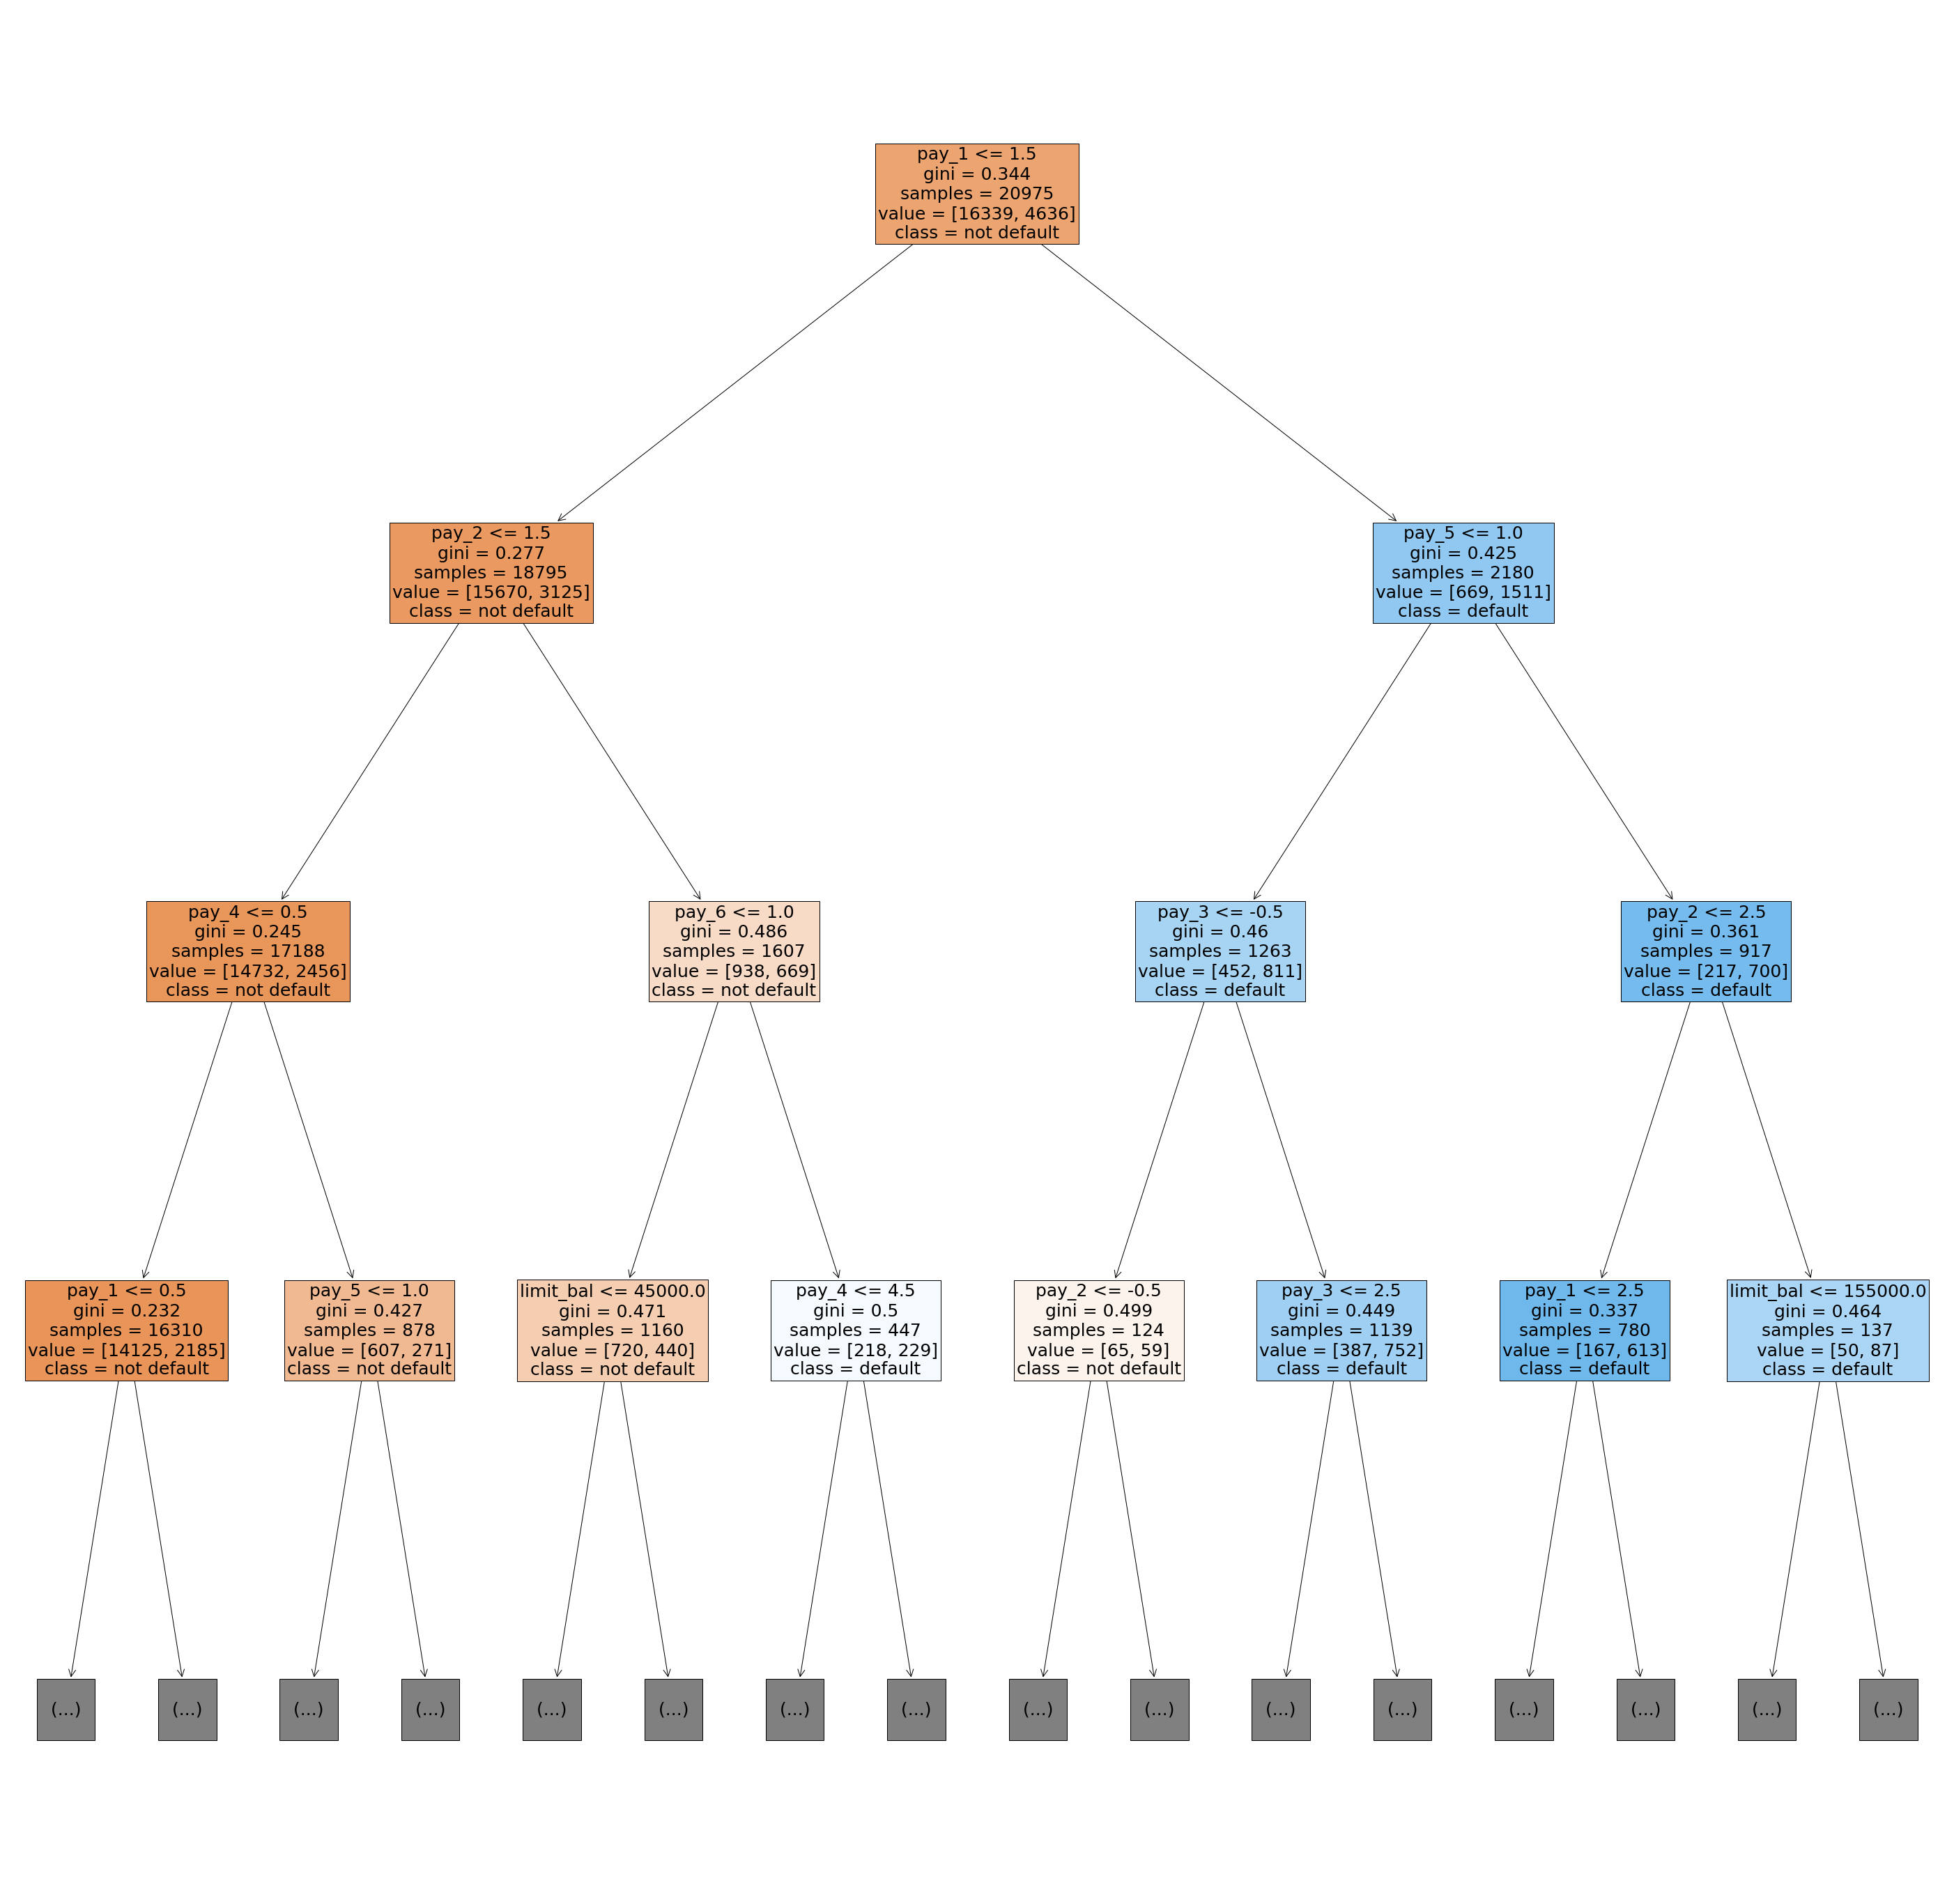

In [295]:
fig2 = plt.figure(figsize = (50, 50))

tree2 = plot_tree(model, max_depth = 3, feature_names = X.columns, 
                 class_names = ['not default', 'default'], filled = True, fontsize = 25)

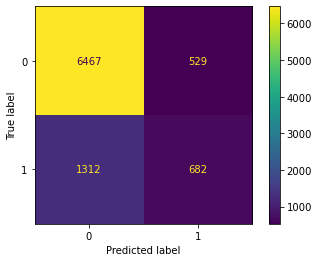

In [309]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [296]:
X = data.iloc[:, 0:26]
y = data['default']
X.head()

,limit_bal,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,education_graduate school,education_high school,education_other,education_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,0,0,1


In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

pred = model.predict(X_test)

In [298]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6996
           1       0.39      0.40      0.40      1994

    accuracy                           0.73      8990
   macro avg       0.61      0.61      0.61      8990
weighted avg       0.73      0.73      0.73      8990



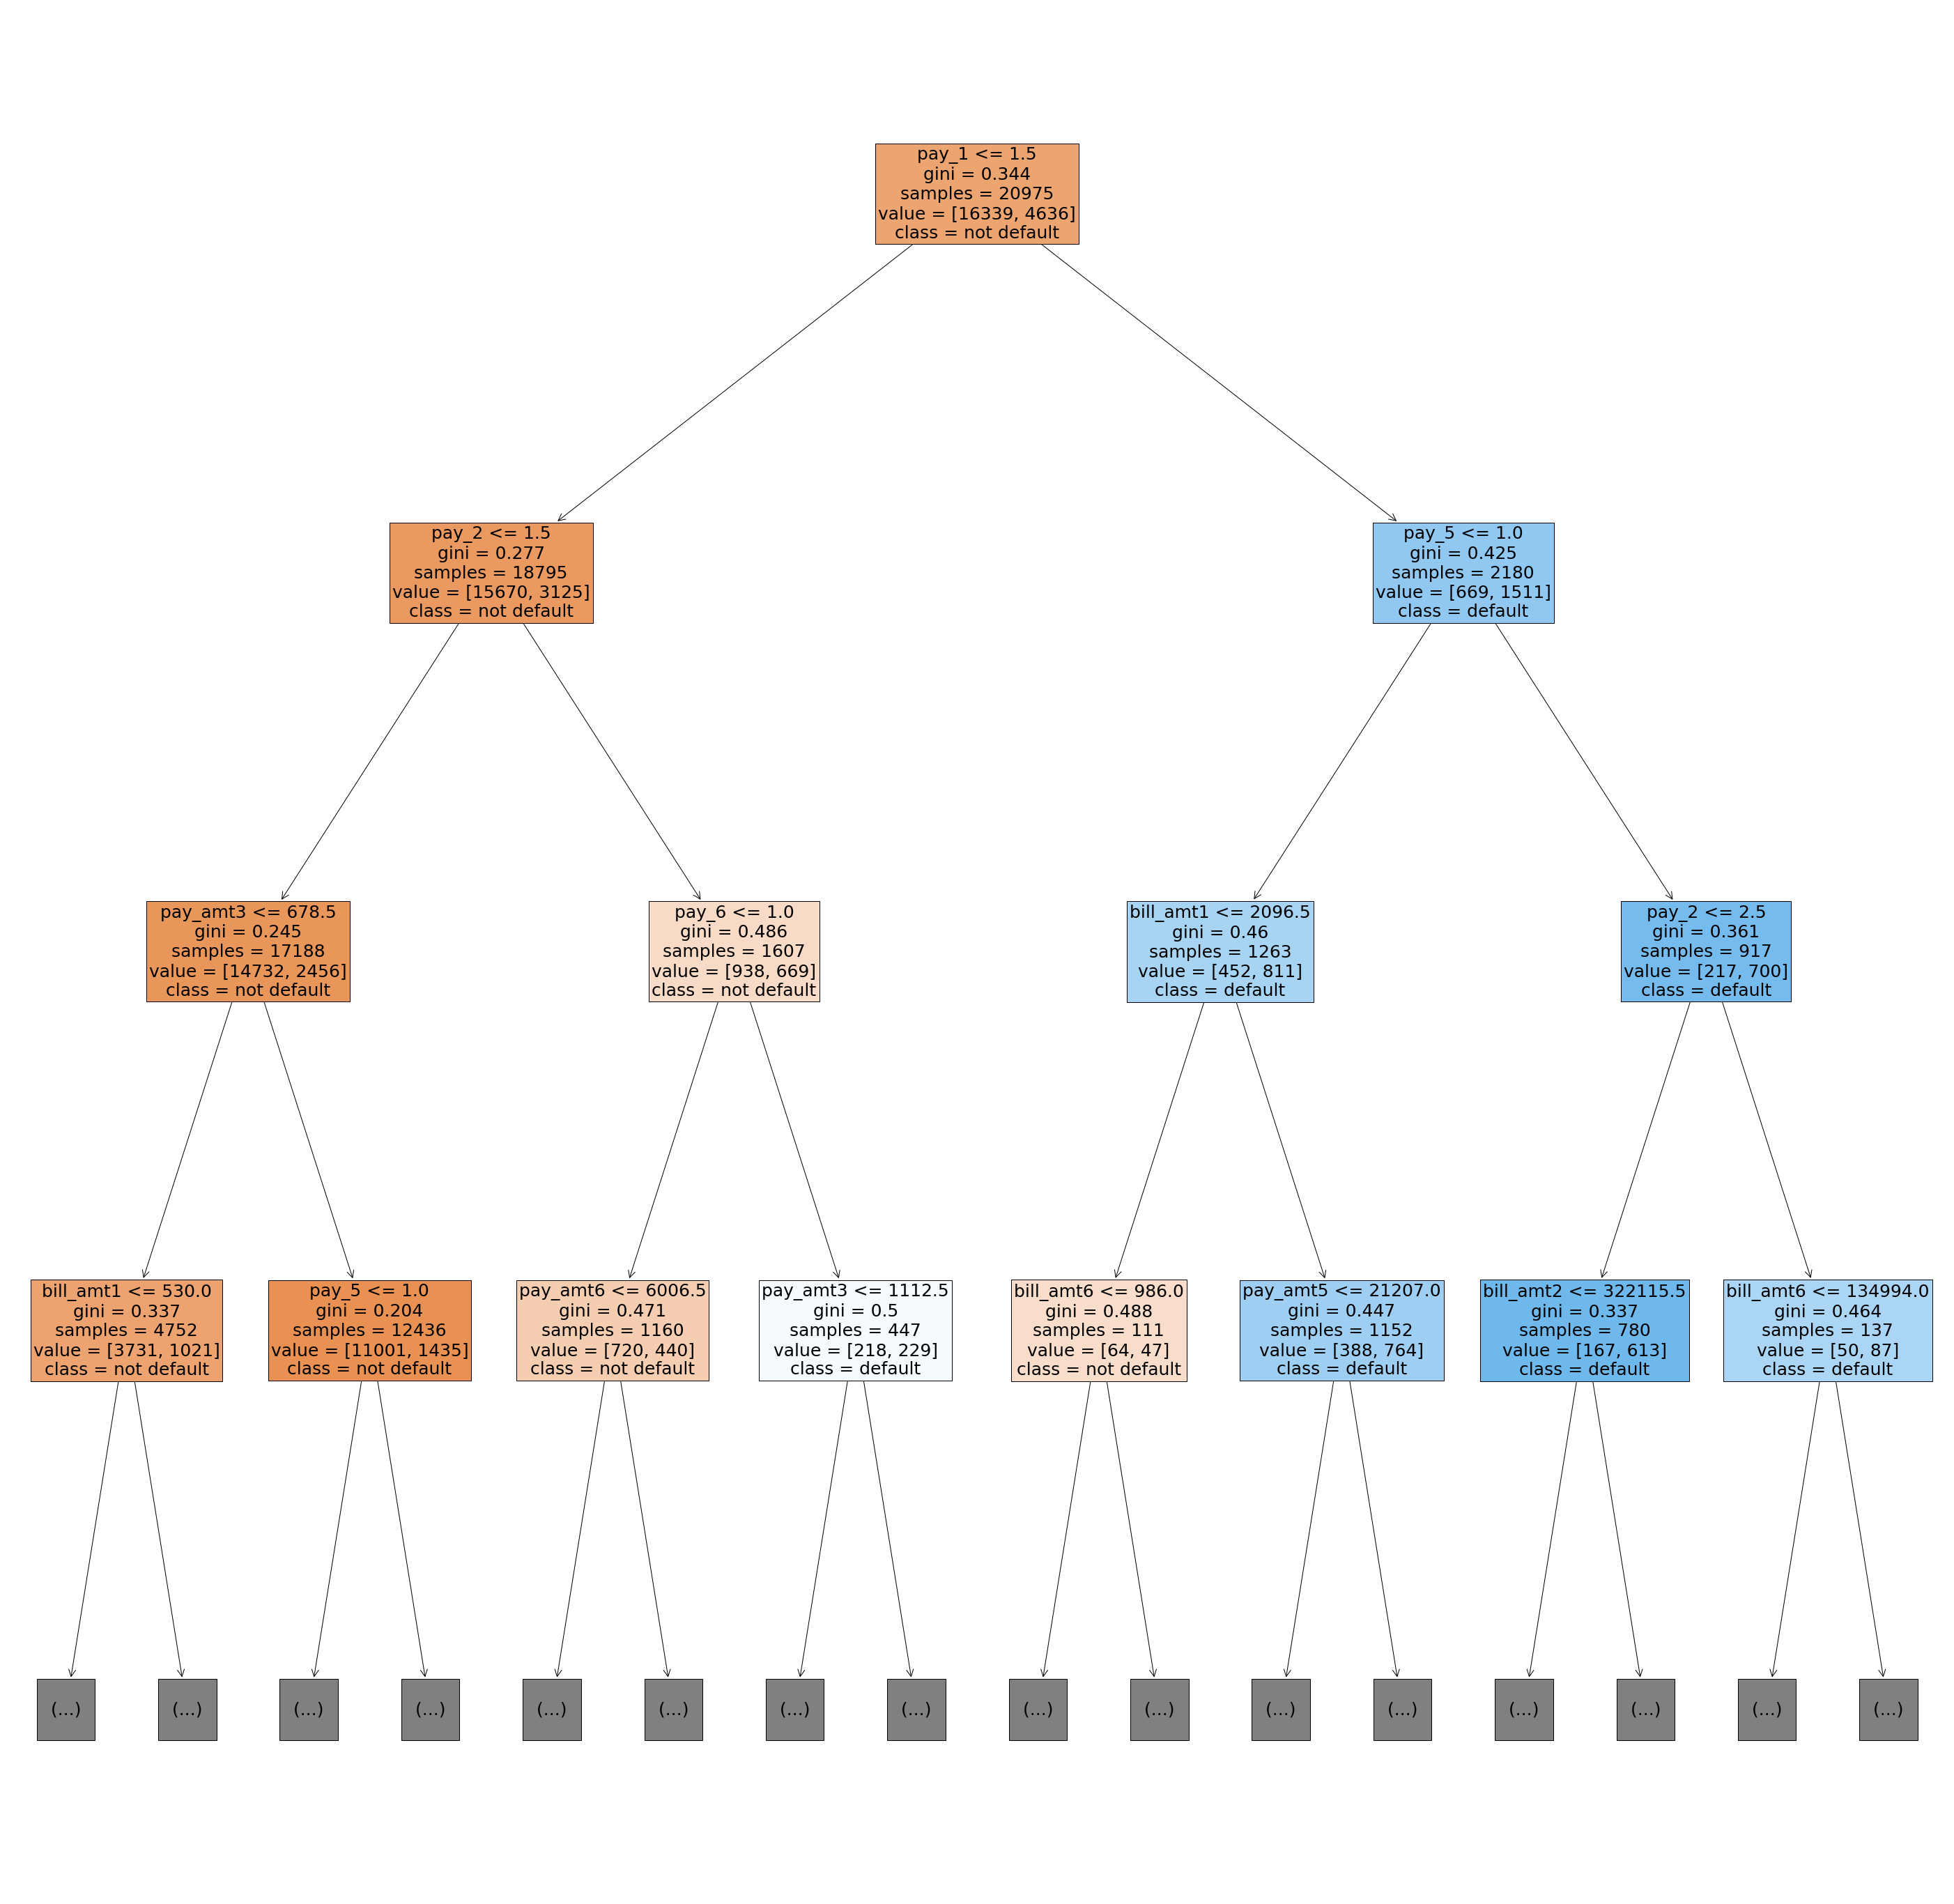

In [299]:
fig3 = plt.figure(figsize = (50, 50))

tree3 = plot_tree(model, max_depth = 3, feature_names = X.columns, 
                 class_names = ['not default', 'default'], filled = True, fontsize = 25)

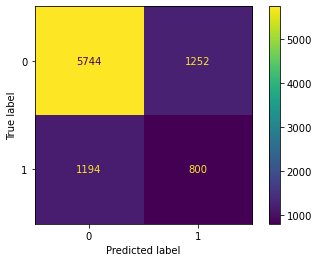

In [302]:
plot_confusion_matrix(model, X_test, y_test)